In [1]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
df = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")

In [4]:
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [5]:
df.columns = ["admit", "gre", "gpa", "prestige"]
df.columns

Index(['admit', 'gre', 'gpa', 'prestige'], dtype='object')

In [6]:
df.describe()

,admit,gre,gpa,prestige
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,587.700000,3.389900,2.48500
std,0.466087,115.516536,0.380567,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


In [7]:
df.std()

admit         0.466087
gre         115.516536
gpa           0.380567
prestige      0.944460
dtype: float64

In [8]:
pd.crosstab(df['admit'], df['prestige'], rownames=['admit'])

prestige,1,2,3,4
admit,,,,
0,28,97,93,55
1,33,54,28,12


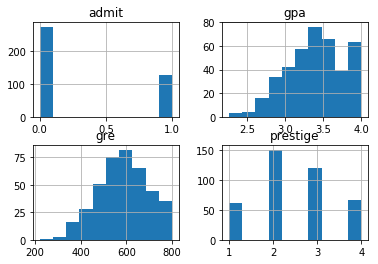

In [9]:
df.hist()
pl.show()

In [10]:
dummy_ranks = pd.get_dummies(df['prestige'], prefix='prestige')

In [11]:
dummy_ranks.head()

,prestige_1,prestige_2,prestige_3,prestige_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1


In [14]:
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.loc[:, 'prestige_2':])
data.head()

,admit,gre,gpa,prestige_2,prestige_3,prestige_4
0,0,380,3.61,0,1,0
1,1,660,3.67,0,1,0
2,1,800,4.00,0,0,0
3,1,640,3.19,0,0,1
4,0,520,2.93,0,0,1


In [15]:
data['intercept'] = 1.0
data.head()

,admit,gre,gpa,prestige_2,prestige_3,prestige_4,intercept
0,0,380,3.61,0,1,0,1.0
1,1,660,3.67,0,1,0,1.0
2,1,800,4.00,0,0,0,1.0
3,1,640,3.19,0,0,1,1.0
4,0,520,2.93,0,0,1,1.0


In [16]:
train_cols = data.columns[1:]
# Index([gre, gpa, prestige_2, prestige_3, prestige_4], dtype=object)

logit = sm.Logit(data['admit'], data[train_cols])

result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573147
         Iterations 6


In [18]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            No. Iterations:   6.0000  
Dependent Variable: admit            Pseudo R-squared: 0.083   
Date:               2018-12-05 12:05 AIC:              470.5175
No. Observations:   400              BIC:              494.4663
Df Model:           5                Log-Likelihood:   -229.26 
Df Residuals:       394              LL-Null:          -249.99 
Converged:          1.0000           Scale:            1.0000  
----------------------------------------------------------------
             Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
----------------------------------------------------------------
gre          0.0023    0.0011   2.0699  0.0385   0.0001   0.0044
gpa          0.8040    0.3318   2.4231  0.0154   0.1537   1.4544
prestige_2  -0.6754    0.3165  -2.1342  0.0328  -1.2958  -0.0551
prestige_3  -1.3402    0.3453  -3.8812  0.0001  -2.0170  -0.6634
prestige_4  -1.5515    0.4178  -3.7131  0.0002  -2.3704  -0.7325
intercept   -3.9900    1.1400  -3.5001  0.0005  -6.2242  -1.7557
===============================================================

"""

In [19]:
# odds ratio
np.exp(result.params)

gre           1.002267
gpa           2.234545
prestige_2    0.508931
prestige_3    0.261792
prestige_4    0.211938
intercept     0.018500
dtype: float64

In [48]:
result.predict() < 0.5

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True, False,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,

In [37]:
pred = np.array([1-result.predict(), result.predict()])
pred.T.shape

(400, 2)

/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


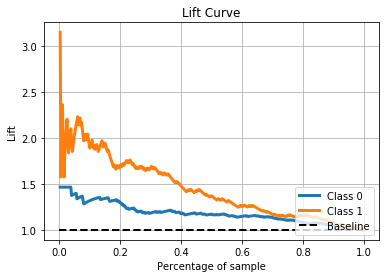

In [38]:
import scikitplot as skplt

skplt.metrics.plot_lift_curve(data['admit'], pred.T)

/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


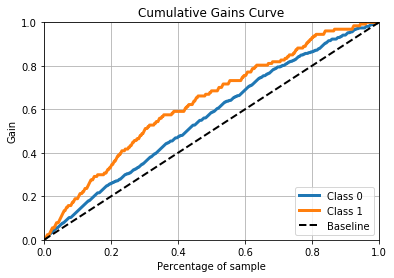

In [41]:
skplt.metrics.plot_cumulative_gain(data['admit'], pred.T)

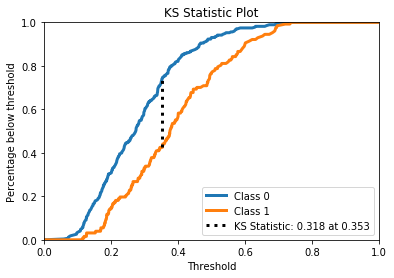

In [43]:
skplt.metrics.plot_ks_statistic(data['admit'], pred.T)

/usr/local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


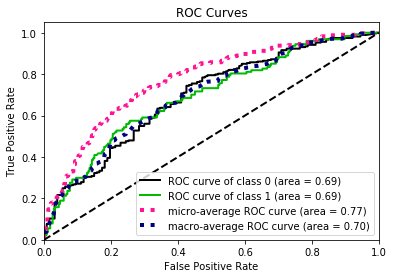

In [44]:
skplt.metrics.plot_roc_curve(data['admit'], pred.T)

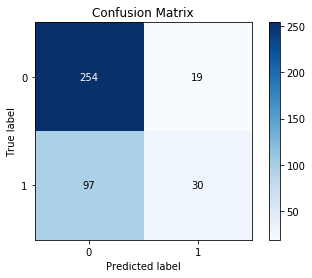

In [52]:
skplt.metrics.plot_confusion_matrix(data['admit'], result.predict() > 0.5)

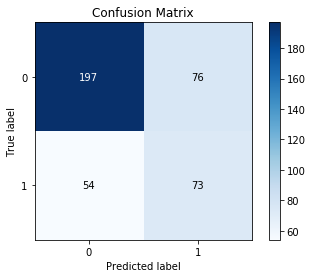

In [53]:
skplt.metrics.plot_confusion_matrix(data['admit'], result.predict() > 0.35)

In [51]:
skplt.metrics.confusion_matrix(data['admit'], result.predict() > 0.5)

array([[254,  19],
       [ 97,  30]])